In [113]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from diabetes import load,split,scale,display

In [116]:
X,y = load()

In [157]:
seed = 0

In [158]:
X_train, X_test, y_train, y_test = split(X,y,seed)

In [159]:
X_train_s, X_test_s = scale(X_train, X_test)

In [144]:
from sklearn.model_selection import GridSearchCV

In [166]:
parameters = {
    "n_estimators":[100],
    "max_depth":[40,50],
    "min_samples_split":[0.025, 0.05],
    "n_jobs":[-1],
    "max_samples": [0.3, 0.4]
}

In [167]:
rf = RandomForestClassifier()

In [168]:
cv = GridSearchCV(rf,parameters,cv=5)

In [169]:
cv.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40, 50], 'max_samples': [0.3, 0.4],
                         'min_samples_split': [0.025, 0.05],
                         'n_estimators': [100], 'n_jobs': [-1]})

In [170]:
display(cv)

Best parameters are: {'max_depth': 40, 'max_samples': 0.4, 'min_samples_split': 0.025, 'n_estimators': 100, 'n_jobs': -1}


0.759 + or -0.015 for the {'max_depth': 40, 'max_samples': 0.3, 'min_samples_split': 0.025, 'n_estimators': 100, 'n_jobs': -1}
0.748 + or -0.013 for the {'max_depth': 40, 'max_samples': 0.3, 'min_samples_split': 0.05, 'n_estimators': 100, 'n_jobs': -1}
0.764 + or -0.015 for the {'max_depth': 40, 'max_samples': 0.4, 'min_samples_split': 0.025, 'n_estimators': 100, 'n_jobs': -1}
0.748 + or -0.008 for the {'max_depth': 40, 'max_samples': 0.4, 'min_samples_split': 0.05, 'n_estimators': 100, 'n_jobs': -1}
0.759 + or -0.006 for the {'max_depth': 50, 'max_samples': 0.3, 'min_samples_split': 0.025, 'n_estimators': 100, 'n_jobs': -1}
0.757 + or -0.018 for the {'max_depth': 50, 'max_samples': 0.3, 'min_samples_split': 0.05, 'n_estimators': 100, 'n_jobs': -1}
0.752 + or -0.02 for the {'max_depth': 50, 'max_samples': 0.4, 'min_samples_split': 0.025, 'n_estimators': 100, 'n_jo

In [171]:
rf = RandomForestClassifier(max_depth=40,max_samples=0.4,min_samples_split=0.025, n_jobs=-1)

In [172]:
rf.fit(X_train_s, y_train)

RandomForestClassifier(max_depth=40, max_samples=0.4, min_samples_split=0.025,
                       n_jobs=-1)

In [173]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 0.4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.025,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
y_pred = rf.predict(X_test_s)

In [175]:
accuracy_score(y_test, y_pred)

0.7857142857142857

In [125]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef, classification_report

In [126]:
y_test.__len__()

154

In [127]:
y_pred.__len__()

154

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.74      0.59      0.66        54

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [177]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          89  11
1          22  32


In [178]:
features = pd.DataFrame({'feature':list(X.columns),'importance':rf.feature_importances_}).sort_values('importance',ascending=False)

In [179]:
features

,feature,importance
1,Glucose,0.300196
5,BMI,0.165546
7,Age,0.161903
6,DiabetesPedigreeFunction,0.106976
0,Pregnancies,0.076558
4,Insulin,0.069785
2,BloodPressure,0.063973
3,SkinThickness,0.055064


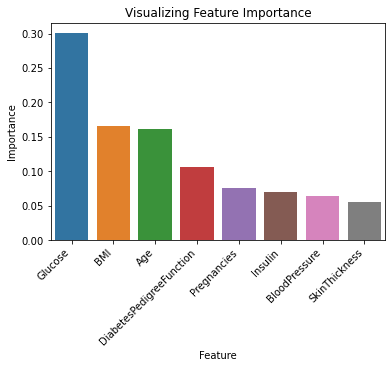

In [180]:
ax = sns.barplot(x = features.feature, y = features.importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Visualizing Feature Importance')
plt.xticks(rotation = 45,ha = 'right')
plt.show()

In [183]:
# load data with selected features
X2 = X.drop(['SkinThickness'], axis=1)

X_train2, X_test2, y_train2, y_test2 = split(X2,y,seed)

# standardize the dataset
scaler2 = StandardScaler()
X_train2_s = scaler2.fit_transform(X_train2)
X_test2_s = scaler2.transform(X_test2)

In [188]:
rf2 = RandomForestClassifier(max_depth=40,max_samples=0.4,min_samples_split=0.025, n_jobs=-1,criterion='entropy')

In [189]:
rf2.fit(X_train2_s,y_train2)

RandomForestClassifier(criterion='entropy', max_depth=40, max_samples=0.4,
                       min_samples_split=0.025, n_jobs=-1)

In [190]:
y_pred2 = rf2.predict(X_test2_s)

In [191]:
accuracy_score(y_test2,y_pred2)

0.7987012987012987

In [192]:
print(pd.crosstab(y_test2, y_pred2, rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          90  10
1          21  33


In [138]:
rf_entropy = RandomForestClassifier(criterion='entropy')

In [139]:
rf_entropy.fit(X_train_s,y_train)

RandomForestClassifier(criterion='entropy')

In [140]:
y_pred_entropy = rf_entropy.predict(X_test_s)

In [141]:
accuracy_score(y_test, y_pred_entropy)

0.7272727272727273

In [142]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
from sklearn import tree

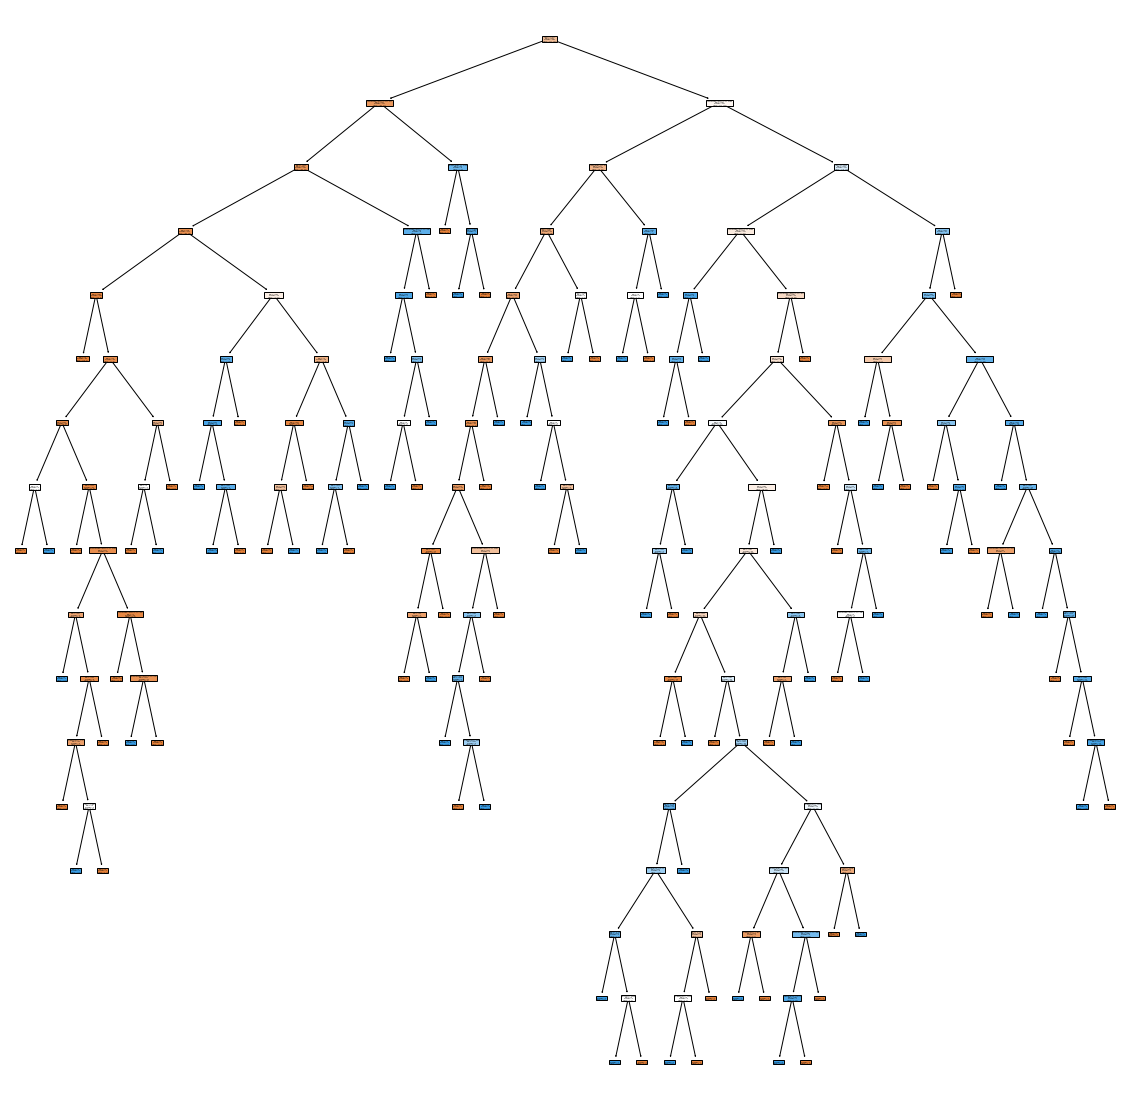

In [111]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [112]:
plt.figure(figsize=(100,100))
tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)
plt.show()

KeyboardInterrupt: 